In [1]:
34+43

77

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [6]:
df = pd.read_csv('/content/1730285881-Airbnb_Open_Data.csv')

/tmp/ipython-input-1710893607.py:1: DtypeWarning:

Columns (11,25) have mixed types. Specify dtype option on import or set low_memory=False.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42392 entries, 0 to 42391
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42392 non-null  int64  
 1   NAME                            42261 non-null  object 
 2   host id                         42392 non-null  int64  
 3   host_identity_verified          42208 non-null  object 
 4   host name                       42159 non-null  object 
 5   neighbourhood group             42363 non-null  object 
 6   neighbourhood                   42376 non-null  object 
 7   lat                             42384 non-null  float64
 8   long                            42384 non-null  float64
 9   country                         42305 non-null  object 
 10  country code                    42313 non-null  object 
 11  instant_bookable                42313 non-null  object 
 12  cancellation_policy             

In [8]:
df.duplicated().value_counts()

,count
False,42392


In [9]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,06/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


In [12]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop house_rules and license columns with insufficient data (ignore if not found)
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False)

# Remove all commas in the price and service fee columns
df['price'] = df['price'].astype(str).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace(',', '', regex=False)

# Rename the price and service fee columns to include a dollar sign
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

# Drop all records with missing values
df.dropna(inplace=True)

# Change all mismatched data types to the appropriate ones
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['Construction year'] = df['Construction year'].astype(int)


In [13]:
df.duplicated().value_counts()

,count
False,34135


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34135 entries, 0 to 42388
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              34135 non-null  int64         
 1   NAME                            34135 non-null  object        
 2   host id                         34135 non-null  object        
 3   host_identity_verified          34135 non-null  object        
 4   host name                       34135 non-null  object        
 5   neighbourhood group             34135 non-null  object        
 6   neighbourhood                   34135 non-null  object        
 7   lat                             34135 non-null  float64       
 8   long                            34135 non-null  float64       
 9   country                         34135 non-null  object        
 10  country code                    34135 non-null  object        
 11  instant

In [15]:
df.describe()

,id,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,3.413500e+04,34135.000000,34135.000000,34135.000000,34036.000000,34031.000000,34135.000000,34135.000000,34135,34135.000000,34135.000000,34135.000000,34135.000000
mean,1.272564e+07,40.727955,-73.951452,2012.475260,625.089934,124.959772,6.211103,31.032869,2018-09-08 17:51:35.673062656,1.252545,3.212509,4.942493,146.469254
min,1.001254e+06,40.508680,-74.239860,2003.000000,50.000000,10.000000,-12.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,6.811808e+06,40.688310,-73.982130,2008.000000,336.000000,67.000000,2.000000,3.000000,2018-04-30 00:00:00,0.160000,2.000000,1.000000,9.000000
50%,1.280012e+07,40.721430,-73.954890,2012.000000,623.000000,125.000000,2.000000,11.000000,2019-04-29 00:00:00,0.580000,3.000000,1.000000,114.000000
75%,1.858132e+07,40.763035,-73.935940,2017.000000,915.000000,183.000000,4.000000,37.000000,2019-06-22 00:00:00,1.840000,4.000000,2.000000,267.000000
max,2.441223e+07,40.908040,-73.712990,2022.000000,1200.000000,240.000000,1250.000000,629.000000,2022-05-21 00:00:00,58.500000,5.000000,327.000000,426.000000
std,6.715805e+06,0.054946,0.045806,5.755753,333.121262,66.616649,19.488593,48.634004,NaN,1.607133,1.325508,24.372074,134.714271


In [17]:
property_type = df['room type'].value_counts().to_frame()
property_type

,count
room type,
Entire home/apt,17841
Private room,15608
Shared room,686


Text(0.5, 1.0, 'Property Types and their count in the Dataset')

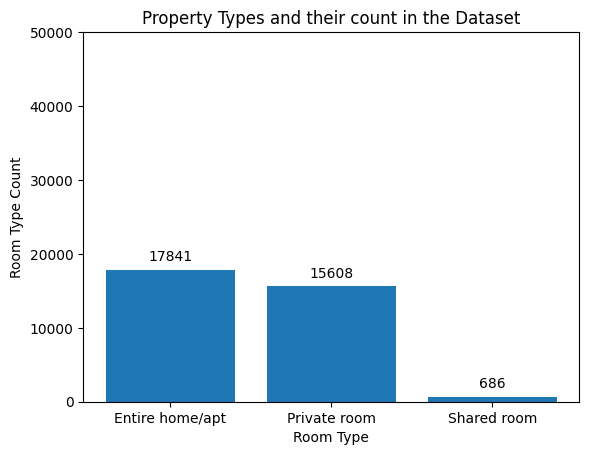

In [19]:
# Room type count plotted on a barchart
room_type_bar = plt.bar(property_type.index, property_type.loc[:, "count"])

plt.bar_label(room_type_bar, labels=property_type.loc[:, "count"], padding=4)
plt.ylim([0, 50000])
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')


In [20]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,14700
Manhattan,14528
Queens,3911
Bronx,734
Staten Island,261
brookln,1


Text(0.5, 1.0, 'Which neighbourhood group has the highest number of listings')

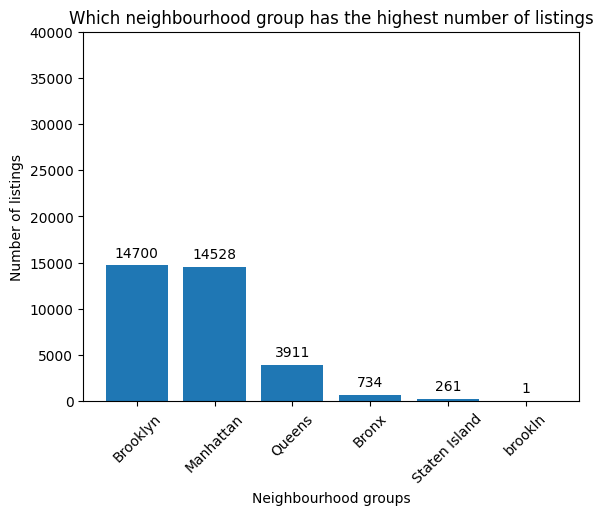

In [21]:
# Room type count plotted on a barchart
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"])

plt.bar_label(hood_group_bar, labels=hood_group.loc[:, "count"], padding=4)
plt.ylim([0, 40000])
plt.xlabel('Neighbourhood groups')
plt.ylabel('Number of listings')
plt.xticks(rotation = 45)
plt.title('Which neighbourhood group has the highest number of listings')

Text(0.5, 1.0, 'Average Price per Listings ($) in each Neighborhood Group')

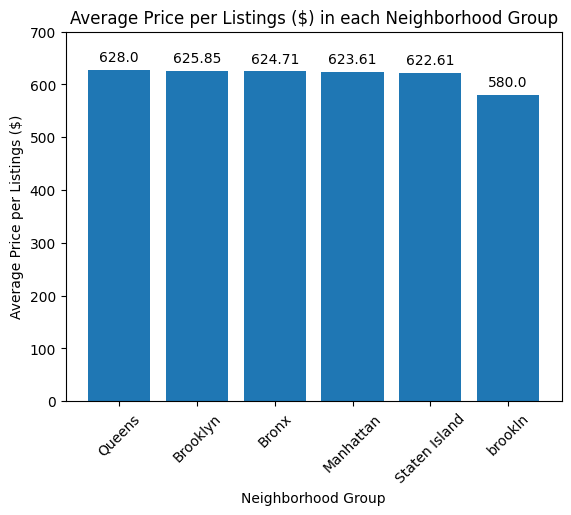

In [22]:
# Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()

avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$'])
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, 'price_$'], 2), label_type='edge', padding=4)

plt.ylim([0, 700])
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listings ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listings ($) in each Neighborhood Group')


Text(0.5, 1.0, 'Average Price for properties in each construction year')

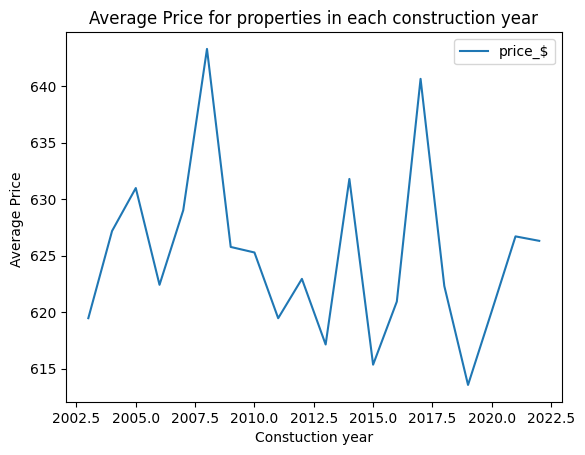

In [25]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Constuction year')
plt.ylabel('Average Price ')
plt.title('Average Price for properties in each construction year')


Text(0.5, 1.0, 'Top 10 Hosts by Calculated Host Listings Count')

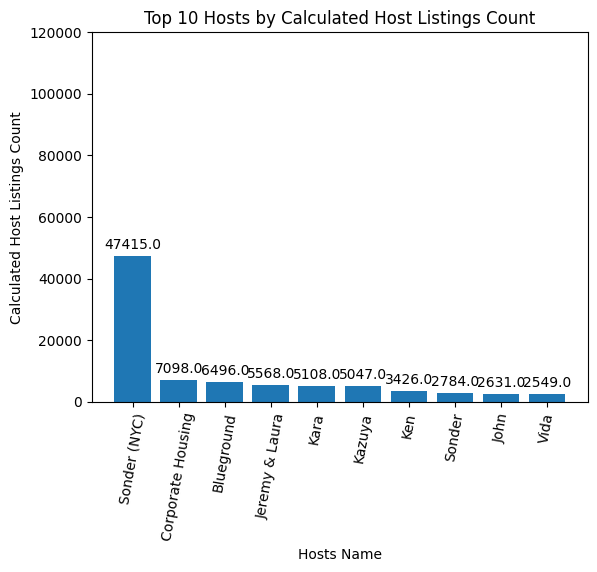

In [26]:
#Who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, labels = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3)
plt.xlabel('Hosts Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation = 80)
plt.ylim([0, 120000])
plt.title('Top 10 Hosts by Calculated Host Listings Count')

In [29]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.218270
unconfirmed,3.206808


Text(0.5, 1.0, 'Average review rate for each verified statistics')

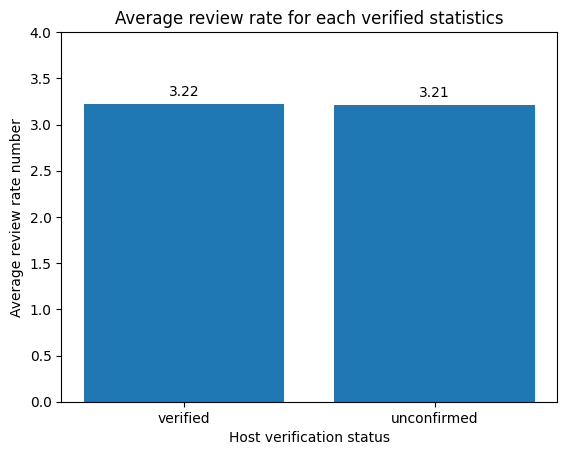

In [30]:
review_bar = plt.bar(review.index, review.loc[:, 'review rate number'])
plt.bar_label(review_bar, labels=round(review.loc[:, 'review rate number'], 2), padding=4)
plt.ylim([0,4])
plt.xlabel('Host verification status')
plt.ylabel('Average review rate number')
plt.title('Average review rate for each verified statistics')

Text(0.5, 1.0, 'Average review rate for each verified statistics')

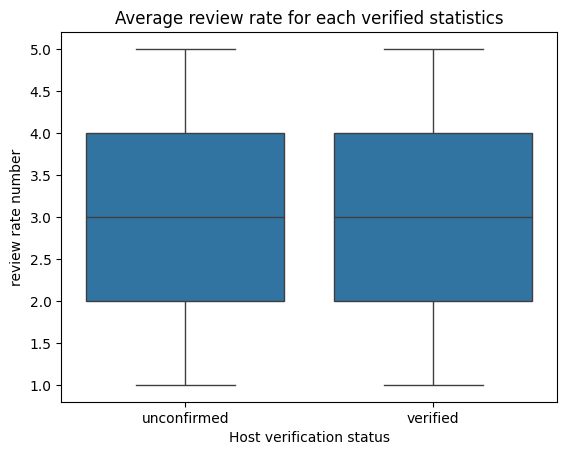

In [31]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color)
plt.xlabel('Host verification status')
plt.ylabel('review rate number')
plt.title('Average review rate for each verified statistics')

In [32]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909946578521)

Text(0.5, 1.0, 'Price vs Service fee')

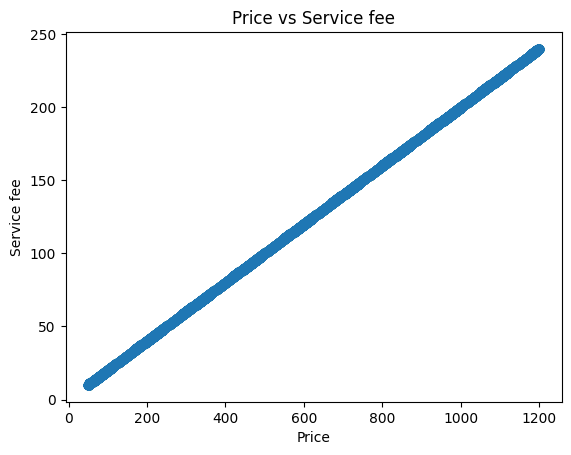

In [33]:
sns.regplot(df, x ='price_$', y = 'service_fee_$')
plt.xlabel('Price')
plt.ylabel('Service fee')
plt.title('Price vs Service fee')

In [35]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.400000
                    Private room               3.284444
                    Shared room                3.103448
Brooklyn            Entire home/apt            3.167941
                    Private room               3.232065
                    Shared room                3.292490
Manhattan           Entire home/apt            3.191413
                    Private room               3.223492
                    Shared room                3.235088
Queens              Entire home/apt            3.224667
                    Private room               3.266667
                    Shared room                3.310345
Staten Island       Entire home/apt            3.371901
                    Private room               3.408759
                    Shared room                4.333333
brookln             Private room               4.000000

Text(0.5, 1.0, 'Average review rate for each room type in each neighbourhood group')

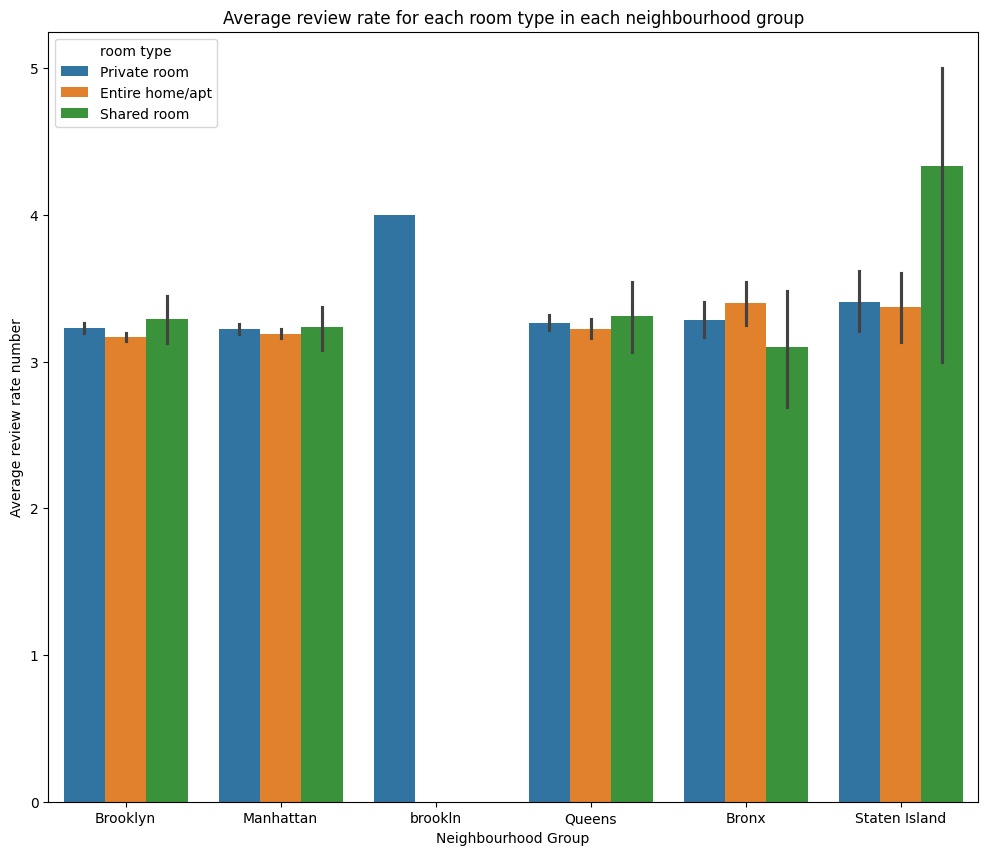

In [36]:
plt.figure(figsize = [12,10])
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average review rate number')
plt.title('Average review rate for each room type in each neighbourhood group')

In [37]:
45+55

100

Text(0.5, 1.0, 'Calculated host listings count vs Price')

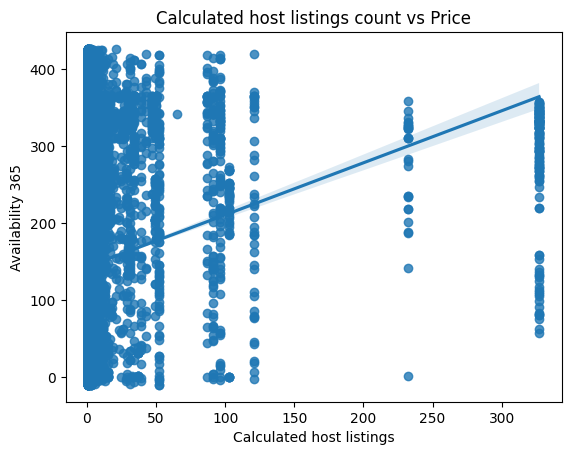

In [38]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365')
plt.xlabel('Calculated host listings')
plt.ylabel('Availability 365')
plt.title('Calculated host listings count vs Price')

In [39]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.12220379911627292)